<a href="https://colab.research.google.com/github/Eluminel/personal_data_science_projects/blob/data_visualization_and_descriptive_statistics/Data_visualization_and_descriptive_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df_car = pd.read_csv('https://raw.githubusercontent.com/catprokhorova/HW_datasets/refs/heads/main/EDA_1/german_used_cars.csv')
df_car.head()

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"


In [ ]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251079 entries, 0 to 251078
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                251079 non-null  int64  
 1   brand                     251079 non-null  object 
 2   model                     251079 non-null  object 
 3   color                     250913 non-null  object 
 4   registration_date         251075 non-null  object 
 5   year                      251079 non-null  object 
 6   price_in_euro             251079 non-null  object 
 7   power_kw                  250945 non-null  object 
 8   power_ps                  250950 non-null  object 
 9   transmission_type         251079 non-null  object 
 10  fuel_type                 251079 non-null  object 
 11  fuel_consumption_l_100km  224206 non-null  object 
 12  fuel_consumption_g_km     251079 non-null  object 
 13  mileage_in_km             250927 non-null  f

In [ ]:
df_car = df_car.drop(['Unnamed: 0'], axis = 1)

In [ ]:
df_car.tail()

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
251074,volvo,Volvo XC40,white,04/2023,2023,57990,192,261,Automatic,Hybrid,NaN,43 km Reichweite,1229.0,Plus Bright T5 Recharge Intellisafe*Surround+P...
251075,volvo,Volvo XC90,white,03/2023,2023,89690,173,235,Automatic,Diesel,"7,6 l/100 km",202 g/km,4900.0,B5 AWD Diesel Ultimate Dark 7-Sitzer Massage F...
251076,volvo,Volvo V60,white,05/2023,2023,61521,145,197,Automatic,Diesel,"4,7 l/100 km",125 g/km,1531.0,"B4 D Plus Dark 145 kW, 5-türig (Diesel)"
251077,volvo,Volvo XC40,white,05/2023,2023,57890,132,179,Automatic,Hybrid,NaN,45 km Reichweite,1500.0,T5 Recharge Plus Dark *Standh*360°*beh.Lenk
251078,volvo,Volvo XC40,gold,03/2023,2023,52900,160,218,Automatic,Electric,NaN,438 km Reichweite,50.0,Ultimate Recharge Twin Motor AHK GJR


### **Сonvert all the columns we are interested in to float64:**

In [ ]:
df_car['price_in_euro'] = pd.to_numeric(df_car['price_in_euro'], errors='coerce')
df_car['power_kw'] = pd.to_numeric(df_car['power_kw'], errors='coerce')
df_car['power_ps'] = pd.to_numeric(df_car['power_ps'], errors='coerce')

In [ ]:
df_car[['price_in_euro', 'power_kw', 'power_ps', 'mileage_in_km']].describe().round(2)

,price_in_euro,power_kw,power_ps,mileage_in_km
count,250880.00,250786.00,250869.00,250927.00
mean,26137.53,126.48,171.81,85340.02
std,36987.95,75.30,99.19,78717.06
min,120.00,1.00,1.00,0.00
25%,11990.00,82.00,111.00,24904.00
50%,19890.00,110.00,150.00,67500.00
75%,29950.00,140.00,190.00,126500.00
max,5890500.00,2023.00,2022.00,3800000.00


### **After analyzing the main characteristics of the columns, we can see that there are clear outliers in the data.**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

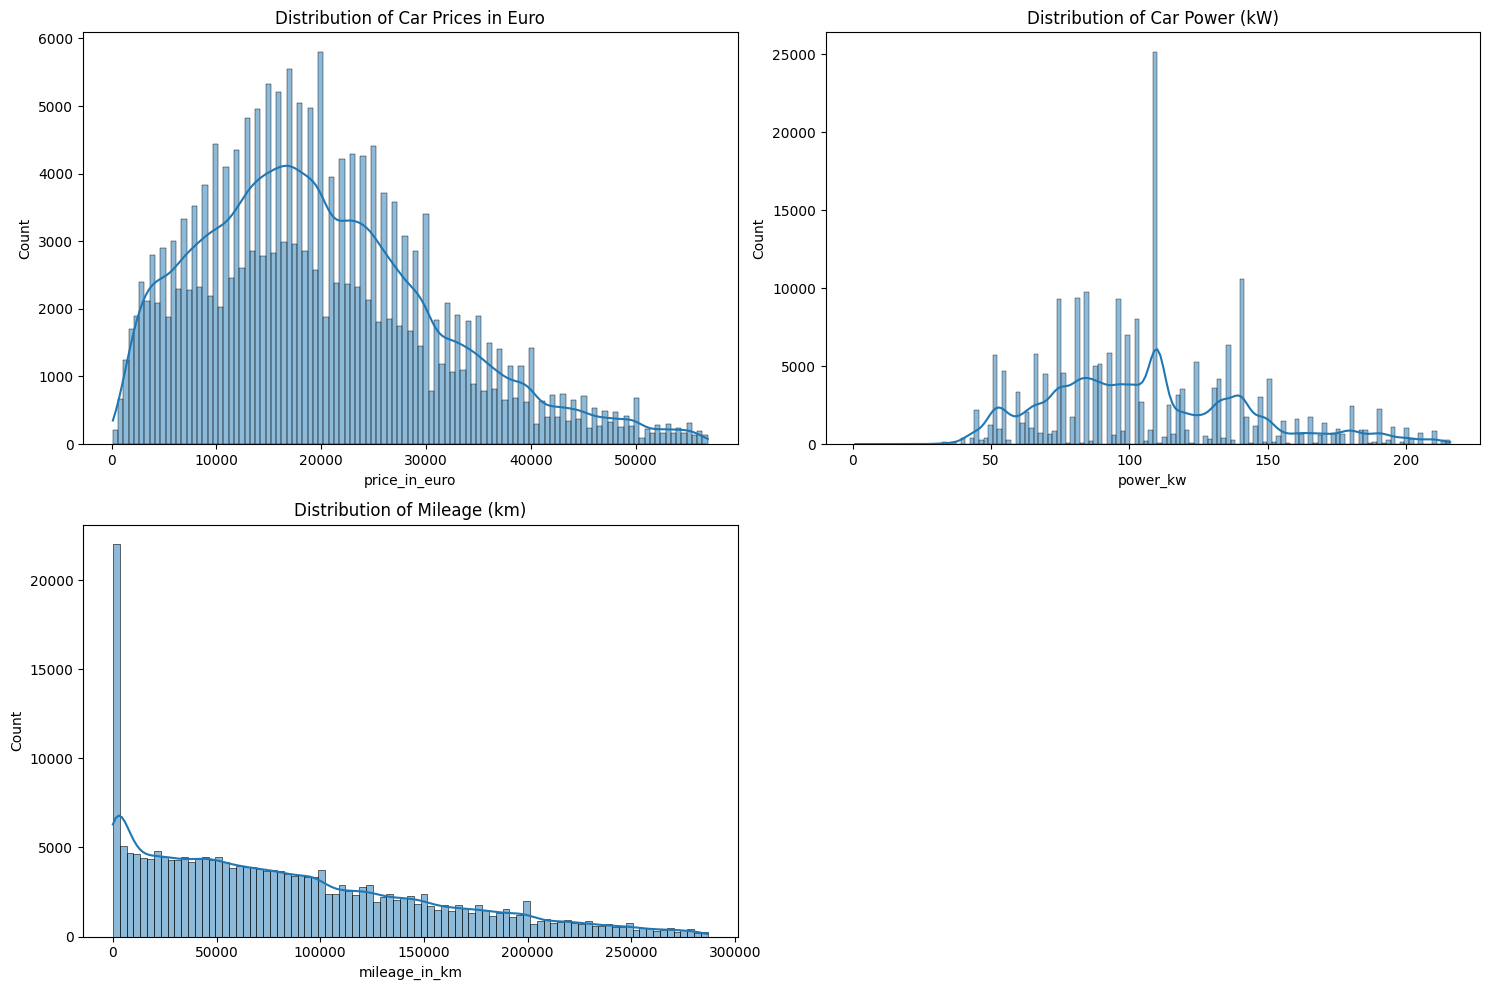

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(df_car['price_in_euro'].dropna(), kde=True)
plt.title('Distribution of Car Prices in Euro')

plt.subplot(2, 2, 2)
sns.histplot(df_car['power_kw'].dropna(), kde=True)
plt.title('Distribution of Car Power (kW)')

plt.subplot(2, 2, 3)
sns.histplot(df_car['mileage_in_km'].dropna(), kde=True)
plt.title('Distribution of Mileage (km)')

plt.tight_layout()
plt.show()

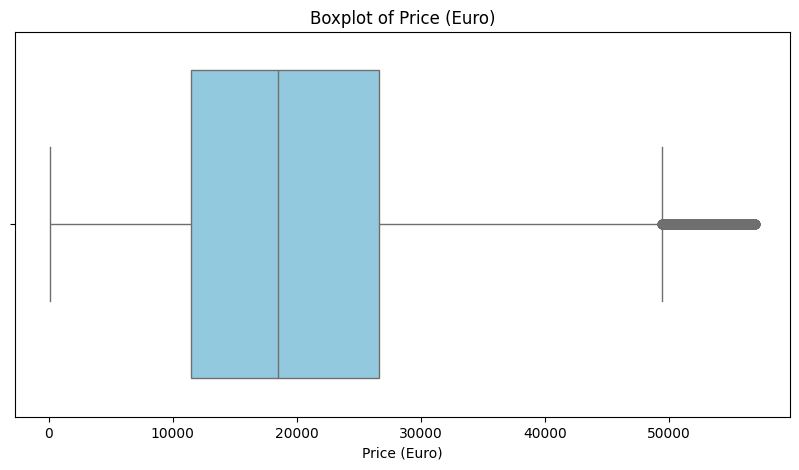

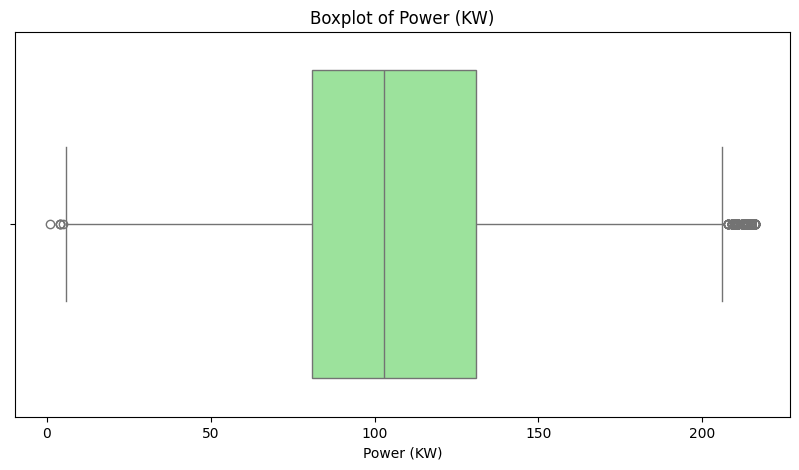

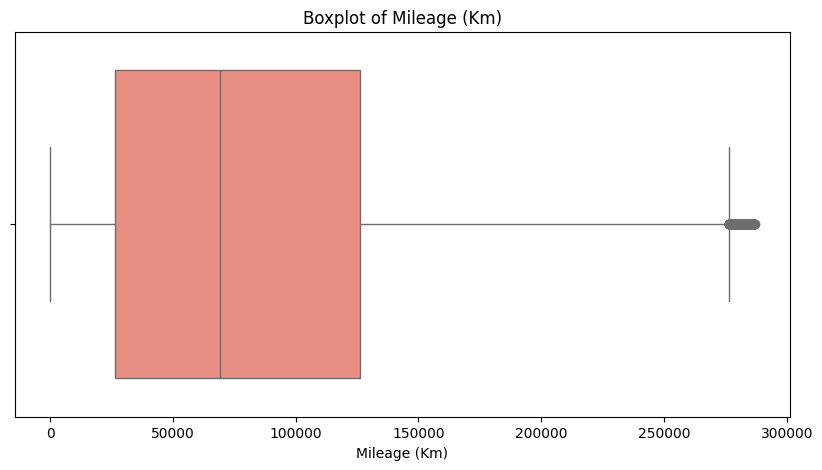

In [ ]:
# Price outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_car, x='price_in_euro', color='skyblue')
plt.title('Boxplot of Price (Euro)')
plt.xlabel('Price (Euro)')
plt.show()

# Power (KW) outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_car, x='power_kw', color='lightgreen')
plt.title('Boxplot of Power (KW)')
plt.xlabel('Power (KW)')
plt.show()

# Mileage outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_car, x='mileage_in_km', color='salmon')
plt.title('Boxplot of Mileage (Km)')
plt.xlabel('Mileage (Km)')
plt.show()


These outliers may be due to data entry errors, different currency units, unique vehicle models with special features, or changes in units of measurement.

In [ ]:
!pip install phik
import phik

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 8.0 MB/s eta 0:00:00


In [ ]:
from phik.report import plot_correlation_matrix

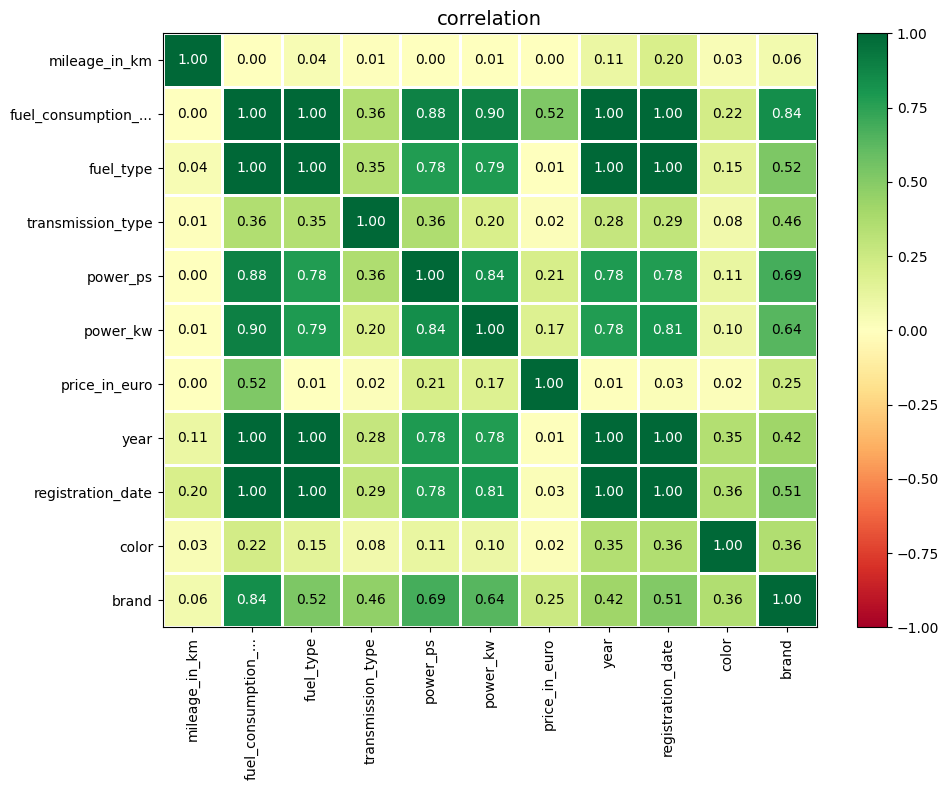

In [ ]:
# removing high-cardinal columns
high_cardinality_columns = ['fuel_consumption_g_km', 'model', 'offer_description']
df_filtered = df_car.drop(columns=high_cardinality_columns)

# calculate the phik matrix for the filtered data
phik_overview = df_filtered.phik_matrix(interval_cols=['price_in_euro', 'power_kw', 'power_ps', 'mileage_in_km'])

# visualizing the correlation matrix
plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, figsize=(10, 8))

### **Questions for graphical analysis:**

## **Question 1: How does price vary with mileage?**

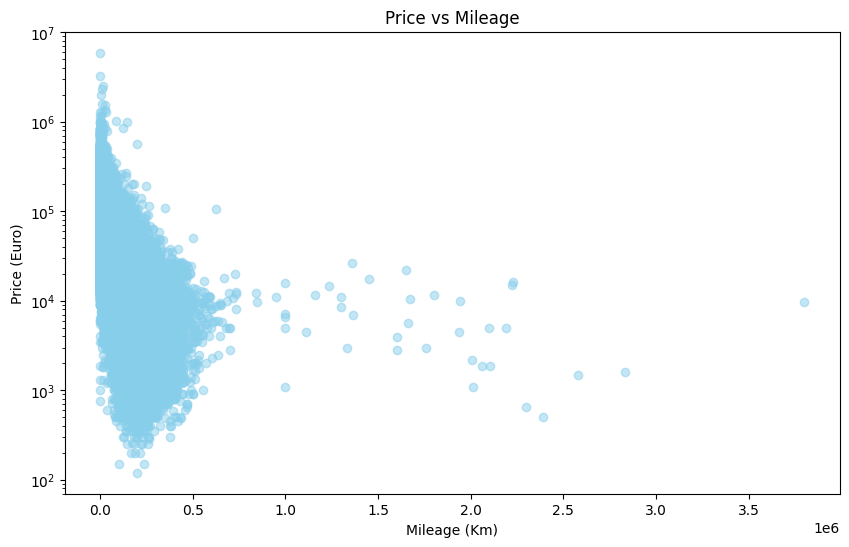

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_car['mileage_in_km'], df_car['price_in_euro'], alpha=0.5, color='skyblue')
plt.title('Price vs Mileage')
plt.xlabel('Mileage (Km)')
plt.ylabel('Price (Euro)')
plt.yscale('log')
plt.show()

The graph shows a downward trend in price as mileage increases, although emissions make it difficult to clearly interpret. Some high-mileage cars also command high prices, likely due to unique features.

## **Question 2: How are prices distributed depending on the year of car production?**

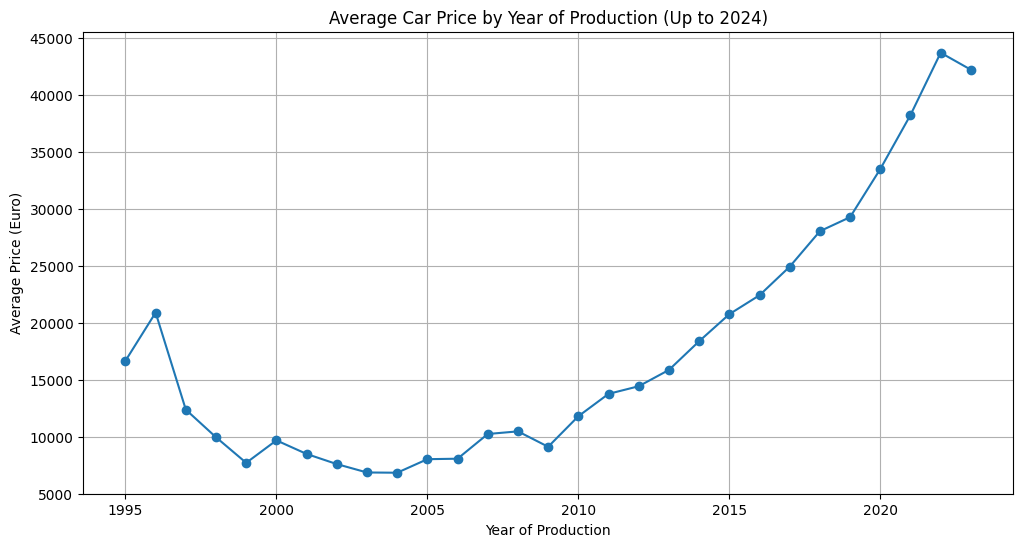

In [ ]:
df_car['year'] = pd.to_numeric(df_car['year'], errors='coerce')
filtered_df = df_car[df_car['year'] <= 2030]
average_price_per_year = filtered_df.groupby('year')['price_in_euro'].mean()

plt.figure(figsize=(12, 6))
plt.plot(average_price_per_year.index, average_price_per_year.values, marker='o', linestyle='-')
plt.title('Average Car Price by Year of Production (Up to 2024)')
plt.xlabel('Year of Production')
plt.ylabel('Average Price (Euro)')
plt.grid(True)
plt.show()

I suppose that due to economic factors, the price of cars initially fell and then began to rise.

## **Question 3: How does transmission type affect the price distribution?**

<ipython-input-38-f0536aec14f5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_car, x='transmission_type', y='price_in_euro', palette='Set3')


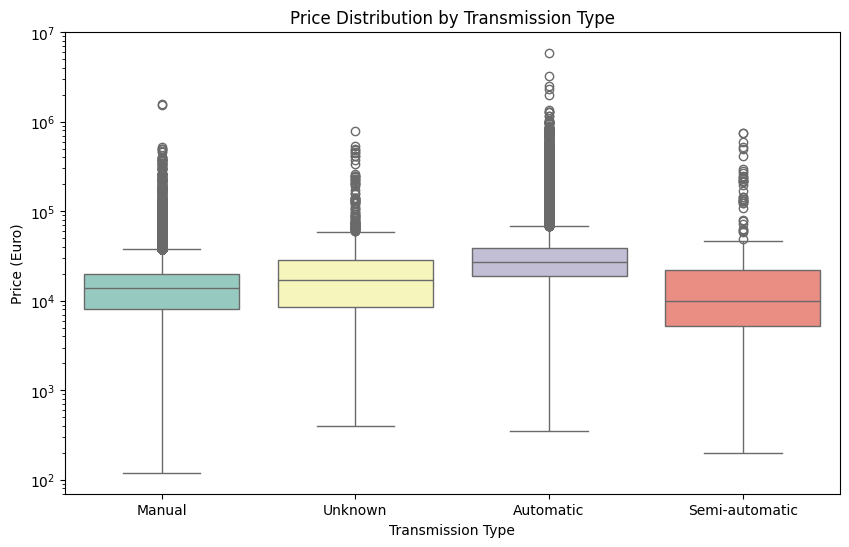

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_car, x='transmission_type', y='price_in_euro', palette='Set3')
plt.yscale('log')
plt.title('Price Distribution by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price (Euro)')
plt.show()

Cars with automatic transmissions have higher median prices than cars with manual transmissions. This may be because automatic transmissions are more common in newer, more expensive cars.

## **Question 4: Is there a relationship between car power and price?**

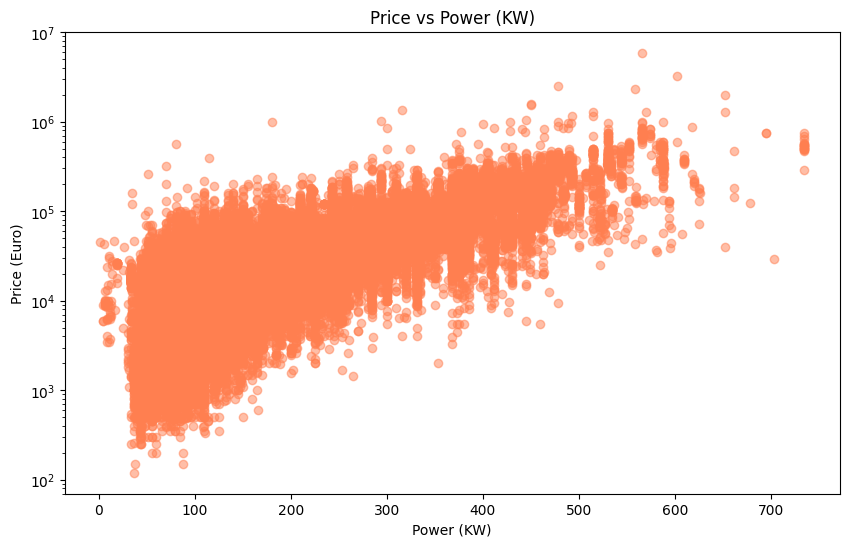

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_car['power_kw'], df_car['price_in_euro'], alpha=0.5, color='coral')
plt.title('Price vs Power (KW)')
plt.xlabel('Power (KW)')
plt.ylabel('Price (Euro)')
plt.yscale('log')
plt.show()

The fourth graph shows that there is a positive correlation between the power of a car and its price, although there are also outliers.

In [ ]:
for column in df_car.columns:
    unique_values = df_car[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in brand: ['alfa-romeo' 'audi' 'bmw' 'cadillac' 'chevrolet' 'chrysler' 'citroen'
 'dacia' 'daewoo' 'daihatsu' 'dodge' 'fiat' 'ford' 'honda' 'hyundai'
 'infiniti' 'isuzu' 'jaguar' 'jeep' 'kia' 'lada' 'lancia' 'land-rover'
 'maserati' 'mazda' 'mercedes-benz' 'mini' 'mitsubishi' 'nissan' 'opel'
 'peugeot' 'porsche' 'proton' 'renault' 'rover' 'saab' 'seat' 'skoda'
 'smart' 'ssangyong' 'toyota' 'volkswagen' 'volvo']
Unique values in model: ['Alfa Romeo GTV' 'Alfa Romeo 164' 'Alfa Romeo Spider' ... 'Volvo XC40'
 'Volvo C40' 'Volvo']
Unique values in color: ['red' 'black' 'silver' 'grey' 'white' 'beige' 'blue' 'green' 'yellow'
 'gold' 'brown' 'bronze' 'violet' nan 'orange']
Unique values in registration_date: ['10/1995' '02/1995' '07/1995' '11/1996' '04/1996' '12/1996' '07/1996'
 '01/1996' '02/1996' '10/1996' '05/1997' '06/1997' '10/1997' '03/1997'
 '01/1997' '02/1997' '04/1997' '07/1997' '07/1998' '05/1998' '01/1998'
 '11/1998' '09/1998' '07/1999' '02/1999' '06/1999' '12/1999' 

In [ ]:
df_car.isna().sum()

,0
brand,0
model,0
color,146
registration_date,0
year,0
price_in_euro,0
power_kw,0
power_ps,0
transmission_type,0
fuel_type,0
